/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecat

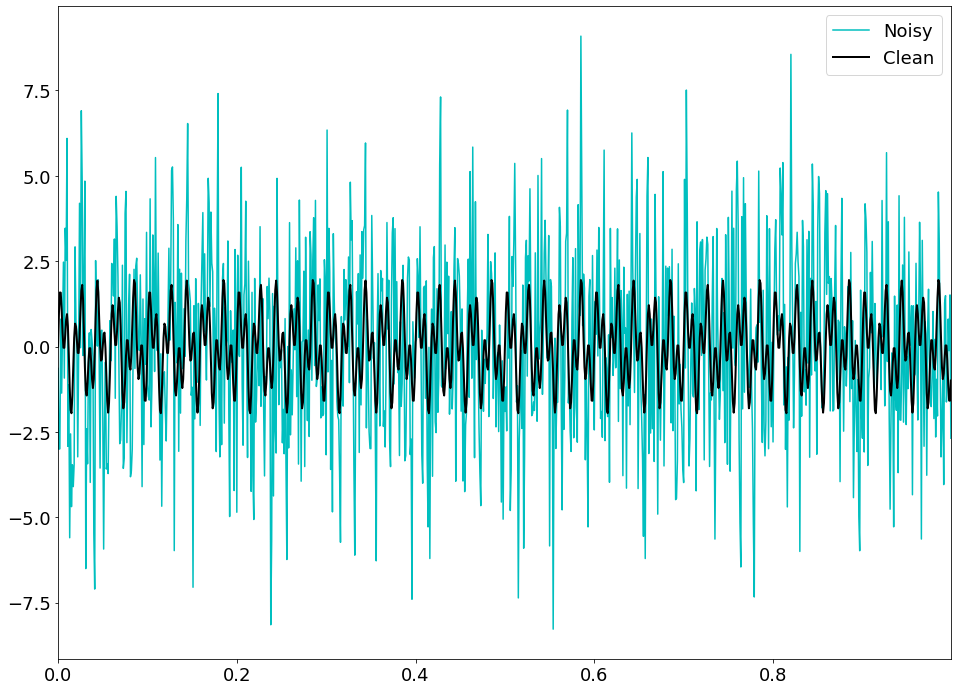

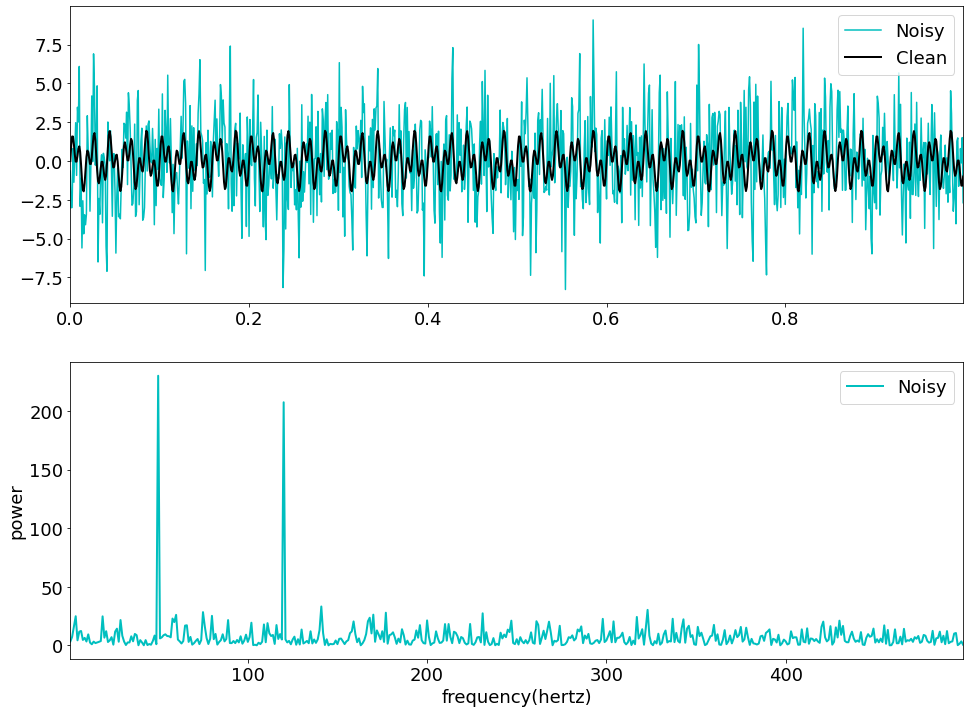

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/shared-libs/python3.7/py/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:65: MatplotlibDeprecationWarning: Case-insensitive prope

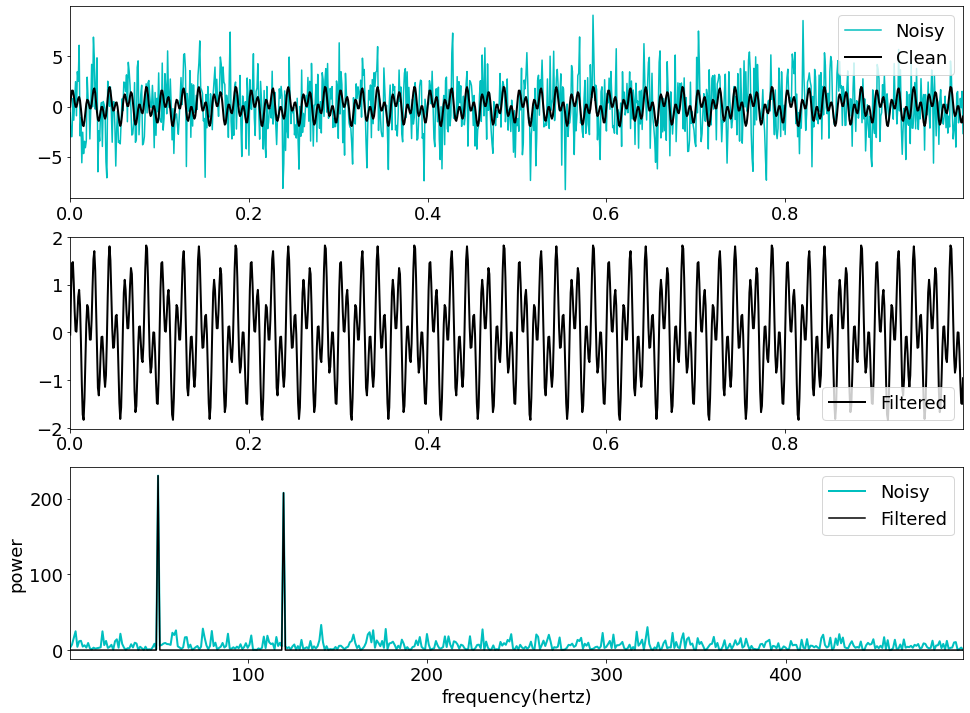

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size': 18})

#Create a simple signal with two frequencies
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # Sum of 2 frequencies
f_clean = f
f = f+2.5*np.random.randn(len(t)) # add some noise

plt.plot(t,f, color='c', LineWidth=1.5,label='Noisy')
plt.plot(t, f_clean, color = 'k', LineWidth=2, label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()


##Compute the Fast Fourier Transform (FFT)

n = len(t)
fhat = np.fft.fft(f,n) # Compute the FFT
PSD = fhat * np.conj(fhat)/n  # Power spectrum density (magnitude at each frequency)
freq = (1/(dt*n)) * np.arange(n) # Create x-axis of frequencies
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of the frequencies

fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t,f, color='c', LineWidth=1.5,label='Noisy')
plt.plot(t, f_clean, color = 'k', LineWidth=2, label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color='c', LineWidth=2, label='Noisy')
plt.xlim(freq[L[0]], freq[L[-1]],)
plt.xlabel("frequency(hertz)")
plt.ylabel("power")
plt.legend()

plt.show()

## Use the PSD to filter out noise
indices = PSD > 100        # Find all freqs with large power
PSDclean = PSD * indices   # Zero out all others
fhat = indices * fhat      # Zero out small Fourier coeff. in Y
ffilt = np.fft.ifft(fhat)  # Inverse FFT for filtered time signal

##Plots
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='c',LineWidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',LineWidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,ffilt,color='k',LineWidth=2,label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L], PSD[L], color='c', LineWidth=2, label='Noisy')
plt.plot(freq[L],PSDclean[L], color='k',LineWidth=1.5,label='Filtered')
plt.xlabel("frequency(hertz)")
plt.ylabel("power")
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1c58af11-5d4f-40f3-a808-e868f2c28485' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>